In [ ]:
import pandas as pd
import glob
import shutil
import sys
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

In [ ]:
df = pd.read_pickle('df.pkl')

In [ ]:
df.to_pickle('df.pkl')

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

result = train_predict(clf, len(y_train), X_train, y_train, X_test, y_test)
result

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
       
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train, learner.predict(X_train), beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, learner.predict(X_test), beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
from sklearn.cross_validation import train_test_split

# Split the features and loan_status data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, loan_status, test_size = 0.2, random_state = 0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

In [ ]:
print(df.shape)

In [6]:
# Categorical features 
cat_features = features.select_dtypes(include=['object']).columns
print(cat_features)

for y in cat_features:
    features = features.join(pd.get_dummies(features[y], prefix=y))
    features.drop(y, axis=1, inplace=True)

Index(['ProductName', 'Platform', 'Processor', 'OsPlatformSubRelease',
       'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor',
       'Census_DeviceFamily', 'Census_PrimaryDiskTypeName',
       'Census_ChassisTypeName', 'Census_PowerPlatformRoleName',
       'Census_InternalBatteryType', 'Census_OSArchitecture',
       'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName',
       'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName',
       'Census_GenuineStateName', 'Census_ActivationChannel',
       'Census_FlightRing', 'EngineVersion_2', 'EngineVersion_3',
       'AppVersion_1', 'AppVersion_2', 'AppVersion_3', 'AvSigVersion_0',
       'AvSigVersion_1', 'AvSigVersion_2', 'OsVer_0', 'OsVer_1', 'OsVer_2',
       'OsVer_3', 'OsBuildLab_0', 'OsBuildLab_1', 'OsBuildLab_2',
       'OsBuildLab_3', 'OsBuildLab_4', 'OsBuildLab_5', 'Census_OSVersion_0',
       'Census_OSVersion_1', 'Census_OSVersion_2', 'Census_OSVersion_3'],
      dtype='object')


KeyError: MemoryError()

In [5]:
# Split the data in features and target label
labels = df['HasDetections']
features = df.drop('HasDetections', axis=1)

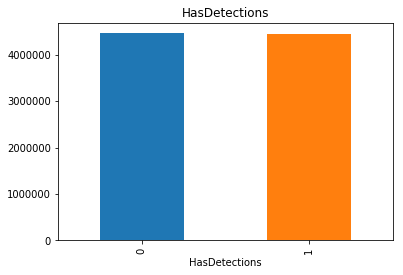

In [4]:
df.groupby('HasDetections').size().plot(kind='bar', title='HasDetections')

In [ ]:
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

In [ ]:
# Remove the rows, where the value count is less than 1000
print(df.Census_InternalBatteryType.value_counts())
# vc = df.Census_InternalBatteryType.value_counts()
# u  = [i not in set(vc[vc<1000].index) for i in df['Census_InternalBatteryType']]
# df = df[u]
print(df.Census_InternalBatteryType.value_counts())

In [ ]:
df.drop(df[df.SmartScreen == '&#x01;'].index, inplace=True)
df.drop(df[df.SmartScreen == '&#x02;'].index, inplace=True)
df.drop(df[df.SmartScreen == '&#x03;'].index, inplace=True)
df.drop(df[df.SmartScreen == '0'].index, inplace=True)
df.drop(df[df.SmartScreen == '00000000'].index, inplace=True)
df.drop(df[df.SmartScreen == 'Enabled'].index, inplace=True)
print(df['SmartScreen'].unique())
df.SmartScreen.value_counts()

In [ ]:
print(df['SmartScreen'].unique())
df.SmartScreen.value_counts()

In [ ]:
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values(ascending=False))
(df.isnull().sum()/df.shape[0]).sort_values().plot()
plt.show()

In [ ]:
for f in drop_list:
    print('Dropping: ' + col)
    df = df.drop(f, 1)

In [ ]:
# Remove columns with only 1 unique value
# Should do in the end also.
# TODO
# df.dropna(thresh=2)
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print('Dropping: ' + col)
        drop_list.append(col)

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
# start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
# print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
df['Census_OSVersion_0'] = df['Census_OSVersion'].apply(break_and_get_part, position=0)
df['Census_OSVersion_1'] = df['Census_OSVersion'].apply(break_and_get_part, position=1)
df['Census_OSVersion_2'] = df['Census_OSVersion'].apply(break_and_get_part, position=2)
df['Census_OSVersion_3'] = df['Census_OSVersion'].apply(break_and_get_part, position=3)

drop_list.append('Census_OSVersion')

print(df['Census_OSVersion_0'].unique())
print(df['Census_OSVersion_1'].unique())
print(df['Census_OSVersion_2'].unique())
print(df['Census_OSVersion_3'].unique())

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
df.loc[df.SmartScreen == 'off', 'SmartScreen'] = "Off"
df.loc[df.SmartScreen == 'on', 'SmartScreen'] = "On"
df.loc[df.SmartScreen == 'OFF', 'SmartScreen'] = "Off"
df.loc[df.SmartScreen == 'requireAdmin', 'SmartScreen'] = "RequireAdmin"
df.loc[df.SmartScreen == 'Promt', 'SmartScreen'] = "Prompt"
df.loc[df.SmartScreen == 'prompt', 'SmartScreen'] = "Prompt"
df.loc[df.SmartScreen == 'warn', 'SmartScreen'] = "Warn"
df.loc[df.SmartScreen == 'requireadmin', 'SmartScreen'] = "RequireAdmin"
print(df['SmartScreen'].unique())

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# print(df['OsBuildLab'].dtype)
# print(df['OsBuildLab'].unique())
df['OsBuildLab_0'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=0)
df['OsBuildLab_1'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=1)
df['OsBuildLab_2'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=2)
df['OsBuildLab_3'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=3)
df['OsBuildLab_4'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=4)
df['OsBuildLab_5'] = df['OsBuildLab'].apply(break_and_get_part_osbuildlab, position=5)
drop_list.append('OsBuildLab')
print(df['OsBuildLab_0'].unique())
print(df['OsBuildLab_1'].unique())
print(df['OsBuildLab_2'].unique())
print(df['OsBuildLab_3'].unique())
print(df['OsBuildLab_4'].unique())
print(df['OsBuildLab_5'].unique())

In [ ]:
import math
def break_and_get_part_osbuildlab(value, position):
    if position < 4:
        try:
            return value.split(".")[position]
        except:
            return math.nan
    elif position == 4:
        try:
            return value.split(".")[4].split('-')[0]
        except:
            return math.nan
    elif position == 5:
        try:
            return value.split(".")[4].split('-')[1]
        except:
            return math.nan

In [ ]:
df['OsVer_0'] = df['OsVer'].apply(break_and_get_part, position=0)
df['OsVer_1'] = df['OsVer'].apply(break_and_get_part, position=1)
df['OsVer_2'] = df['OsVer'].apply(break_and_get_part, position=2)
df['OsVer_3'] = df['OsVer'].apply(break_and_get_part, position=3)
drop_list.append('OsVer')
print(df['OsVer_0'].unique())
print(df['OsVer_1'].unique())
print(df['OsVer_2'].unique())
print(df['OsVer_3'].unique())

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
# Now analyze the next 5 features
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
  print(y, df[y].dtype)
  print(df[y].unique())
start_cnt += show_cnt

In [ ]:
print(df['EngineVersion_0'].unique())
print(df['EngineVersion_1'].unique())
print(df['EngineVersion_2'].unique())
print(df['EngineVersion_3'].unique())
print(df['AppVersion_0'].unique())
print(df['AppVersion_1'].unique())
print(df['AppVersion_2'].unique())
print(df['AppVersion_3'].unique())
print(df['AvSigVersion_0'].unique())
print(df['AvSigVersion_1'].unique())
print(df['AvSigVersion_2'].unique())
print(df['AvSigVersion_3'].unique())

In [ ]:
df['EngineVersion_0'] = df['EngineVersion'].apply(break_and_get_part, position=0)
df['EngineVersion_1'] = df['EngineVersion'].apply(break_and_get_part, position=1)
df['EngineVersion_2'] = df['EngineVersion'].apply(break_and_get_part, position=2)
df['EngineVersion_3'] = df['EngineVersion'].apply(break_and_get_part, position=3)

df['AppVersion_0'] = df['AppVersion'].apply(break_and_get_part, position=0)
df['AppVersion_1'] = df['AppVersion'].apply(break_and_get_part, position=1)
df['AppVersion_2'] = df['AppVersion'].apply(break_and_get_part, position=2)
df['AppVersion_3'] = df['AppVersion'].apply(break_and_get_part, position=3)

df['AvSigVersion_0'] = df['AvSigVersion'].apply(break_and_get_part, position=0)
df['AvSigVersion_1'] = df['AvSigVersion'].apply(break_and_get_part, position=1)
df['AvSigVersion_2'] = df['AvSigVersion'].apply(break_and_get_part, position=2)
df['AvSigVersion_3'] = df['AvSigVersion'].apply(break_and_get_part, position=3)

drop_list.append('EngineVersion')
drop_list.append('AppVersion')
drop_list.append('AvSigVersion')

In [ ]:
def break_and_get_part(value, position):
    return value.split(".")[position]

In [ ]:
# Now analyze one column at a time
start_cnt = 0
show_cnt = 5
print(df.iloc[:5,start_cnt:start_cnt+show_cnt])
for y in df.columns[start_cnt:start_cnt+show_cnt]:
    print(y, df[y].dtype)
start_cnt += show_cnt

In [3]:
# Blindly replace all nan with 0.
# This has to be change later.
df = df.replace(np.nan, 0)

In [ ]:
# Remove columns with only 1 unique value
# Should do in the end also.
# TODO
# df.dropna(thresh=2)
for col in df:
    if(len(df.loc[:,col].unique()) == 1):
        print('Dropping: ' + col)
        drop_list.append(col)

In [ ]:
# Drop MachineIdentifier
drop_list.append('MachineIdentifier')

In [ ]:
drop_list = []

import operator 
# Find all the NaN
# See what percentage of each column is NaN
x_pct = {}
length = len(df)
for y in df.columns:
    if df[y].isnull().sum() > 0:
        x_cnt = df[y].isnull().sum()
        x_pct[y] = 100.0*x_cnt/length
        
x_pct_list = sorted(x_pct.items(), key=operator.itemgetter(1), reverse=True)
      
# Print the features, where more than 80% of the data is NaN    
for f, val in x_pct_list:
    if val > 80:
        print(f, val)
        drop_list.append(f)
        print('Dropping: ' + f)
        print('------')

In [ ]:
pd.set_option('max_colwidth',1000)

In [ ]:
import matplotlib.pyplot as plt
# Percentage of nulls
print(type(df.isnull().sum()/df.shape[0]))
plt.figure()
# (df.isnull().sum()/df.shape[0]).plot.hist()
print((df.isnull().sum()/df.shape[0]).sort_values())
(df.isnull().sum()/df.shape[0]).sort_values().plot()
plt.show()

In [ ]:
# Delete columns, where all the entries are 0.
df = df.loc[:, (df != 0).any(axis=0)]
print(df.shape)
df.info()

In [ ]:
file = 'data/train.csv'
df = pd.read_csv(file)

In [ ]:
import pandas as pd
import glob
import shutil
import sys
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import Imputer